In [36]:
import numpy as np 

from scipy.integrate import solve_ivp

from pylab import cm
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.style.use('seaborn')

In [57]:
def f_rot(x, y): 
    return (y**3 + x**2*y - y - x) / (x*y**2+x**3+y-x)

In [65]:
x, y = np.linspace(-2.5, 2.5, 25), np.linspace(-2, 2, 25) 
X, Y = np.meshgrid(x, y) 

dYdX = f_rot(X, Y) 
U = (1. / (1. + dYdX**2) ** 0.5) * np.ones(Y.shape) 
V = (1. / (1. + dYdX**2) ** 0.5) * dYdX

/tmp/ipykernel_114880/3321281476.py:2: RuntimeWarning: invalid value encountered in divide
  return (y**3 + x**2*y - y - x) / (x*y**2+x**3+y-x)


In [78]:
def single_solve(y0): 
    return solve_ivp(f_rot, t_span=[-2, 1], y0=[y0])

In [79]:
res = single_solve(-1)

resx, resy = res.t, res.y.flatten() 

Text(0, 0.5, 'y')

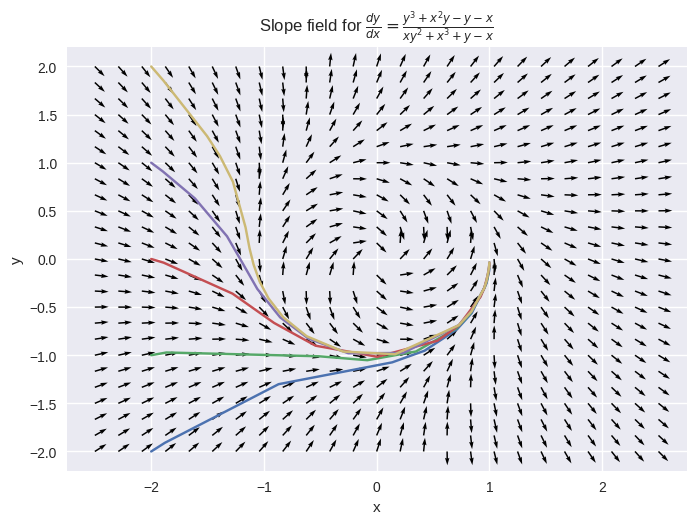

In [82]:
plt.quiver(X, Y, U, V, cmap='coolwarm')

y0s = np.linspace(-2., 2., 5)

for y0 in y0s: 
    res = single_solve(y0) 
    resx, resy = res.t, res.y.flatten() 

    plt.plot(resx, resy)

plt.title(r"Slope field for $\frac{dy}{dx} = \frac{y^3 + x^2y - y- x}{xy^2 + x^3 + y - x}  $")
plt.xlabel("x")
plt.ylabel('y')